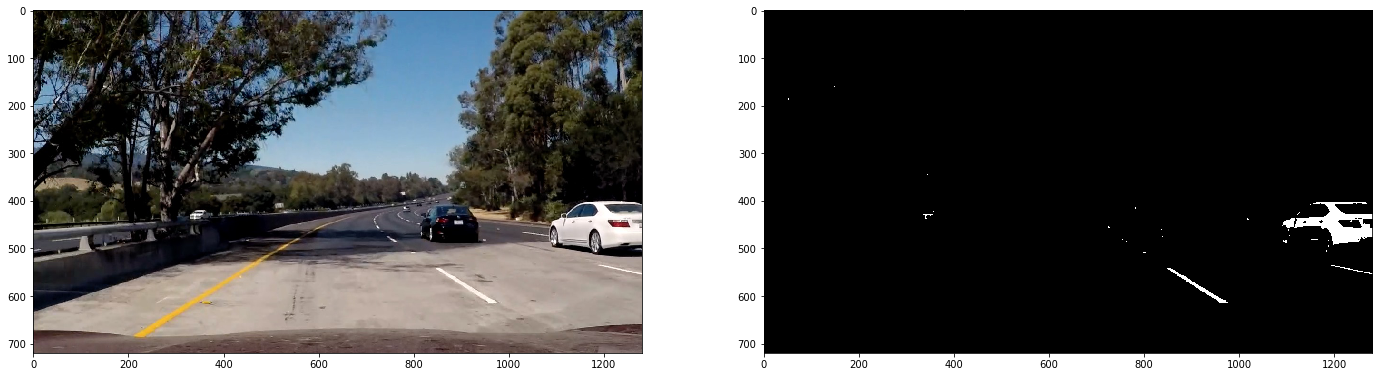

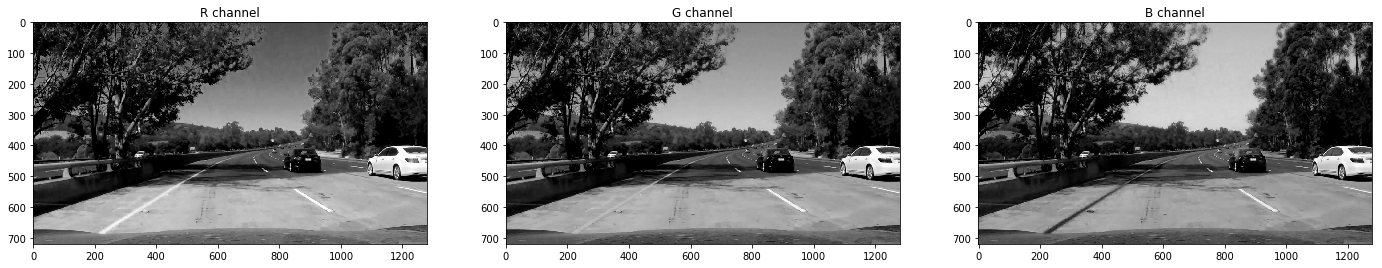

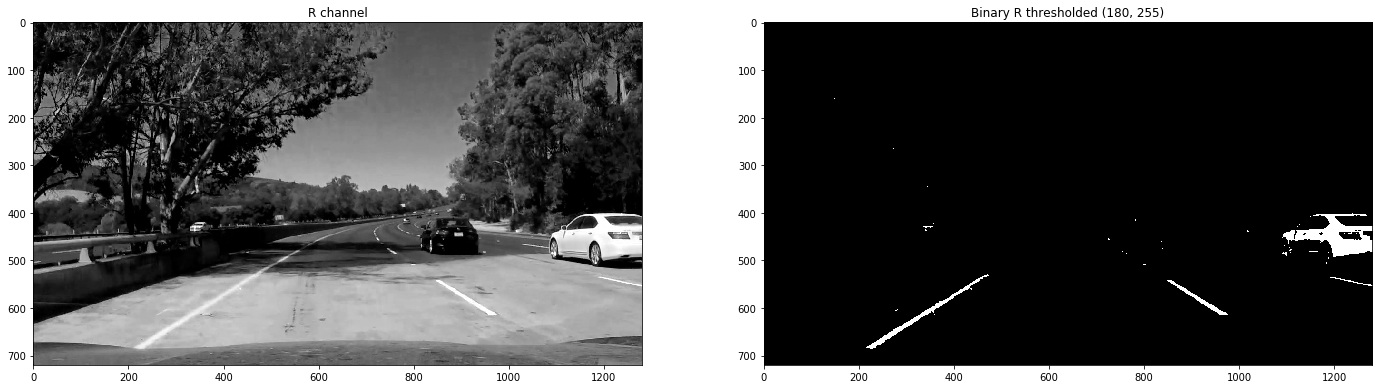

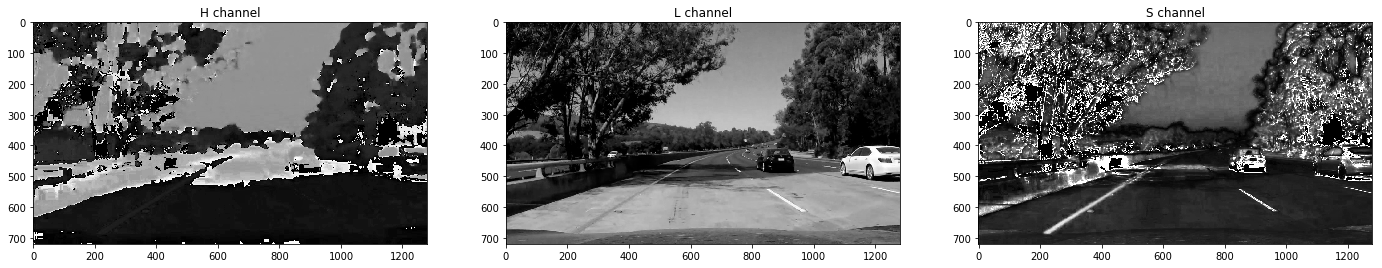

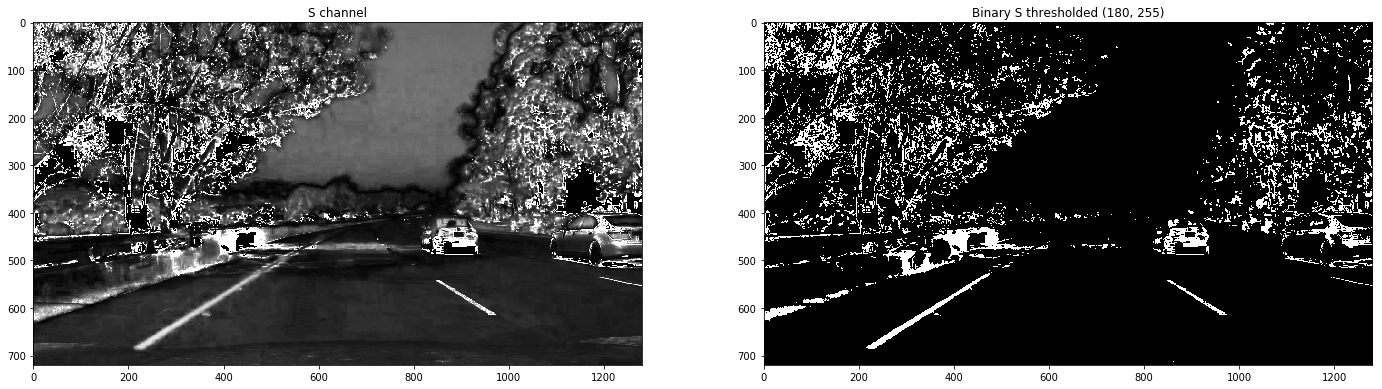

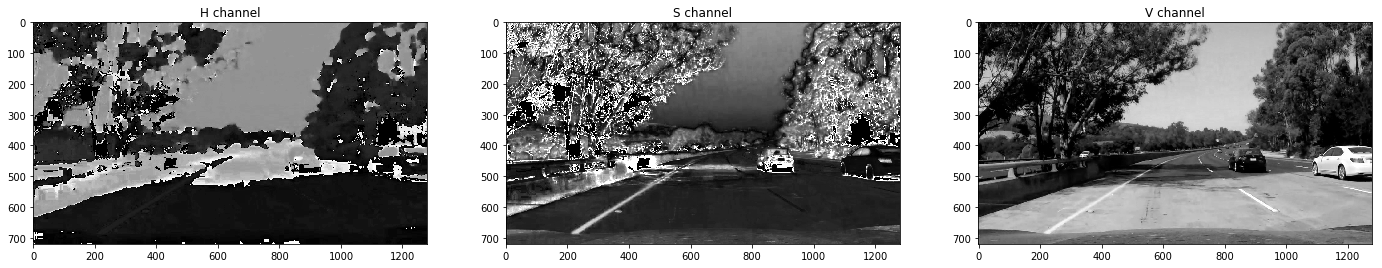

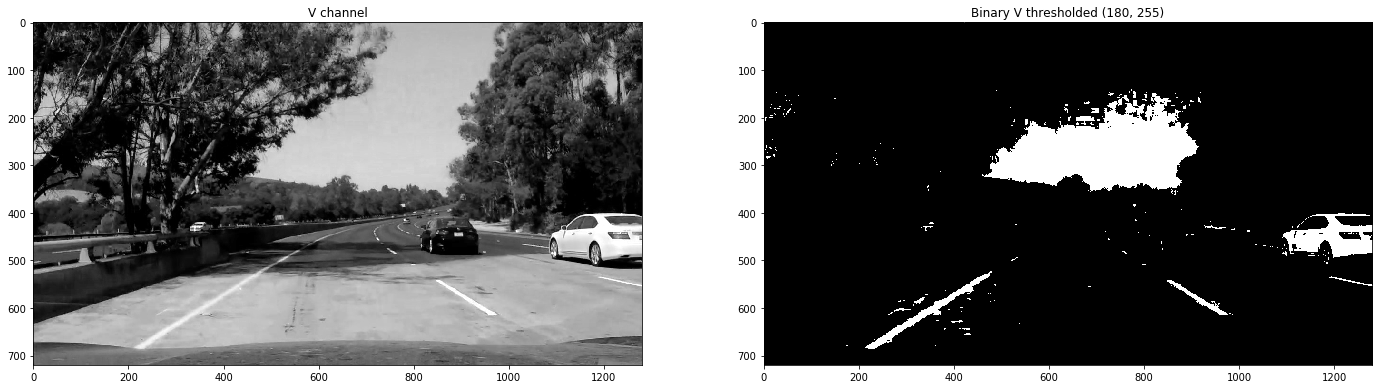

In [380]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# Color thresholding experiments
image = mpimg.imread('test_images/test5.jpg')

thresh = (220, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray >= thresh[0]) & (gray <= thresh[1])] = 1
f, ax = plt.subplots(1, 2, figsize=(24, 9))
ax[0].imshow(image)
ax[1].imshow(binary, cmap='gray')


R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
ax[0].set_title('R channel')
ax[1].set_title('G channel')
ax[2].set_title('B channel')
ax[0].imshow(R, cmap='gray')
ax[1].imshow(G, cmap='gray')
ax[2].imshow(B, cmap='gray')

thresh = (220, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

f, ax = plt.subplots(1, 2, figsize=(24, 9))
ax[0].imshow(R, cmap='gray')
ax[0].set_title('R channel')
ax[1].set_title('Binary R thresholded (180, 255)')
ax[1].imshow(binary, cmap='gray')


hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
ax[0].set_title('H channel')
ax[1].set_title('L channel')
ax[2].set_title('S channel')
ax[0].imshow(H, cmap='gray')
ax[1].imshow(L, cmap='gray')
ax[2].imshow(S, cmap='gray')

thresh = (150, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

f, ax = plt.subplots(1, 2, figsize=(24, 9))
ax[0].imshow(S, cmap='gray')
ax[0].set_title('S channel')
ax[1].set_title('Binary S thresholded (180, 255)')
ax[1].imshow(binary, cmap='gray')


hls = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
H = hls[:,:,0]
S = hls[:,:,1]
V = hls[:,:,2]

f, ax = plt.subplots(1, 3, figsize=(24, 9))
ax[0].set_title('H channel')
ax[1].set_title('S channel')
ax[2].set_title('V channel')
ax[0].imshow(H, cmap='gray')
ax[1].imshow(S, cmap='gray')
ax[2].imshow(V, cmap='gray')

thresh = (200, 255)
binary = np.zeros_like(V)
binary[(V > thresh[0]) & (V <= thresh[1])] = 1

f, ax = plt.subplots(1, 2, figsize=(24, 9))
ax[0].set_title('V channel')
ax[0].imshow(V, cmap='gray')
ax[1].set_title('Binary V thresholded (180, 255)')
ax[1].imshow(binary, cmap='gray')

In [381]:
def mag_thresh(gray, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    
    # Apply threshold
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return mag_binary

def abs_sobel_thresh(gray, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    # Apply threshold
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    
    grad_binary = np.zeros_like(scaled_sobel)
    
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
        
    return grad_binary


def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    abs_sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    # Apply threshold
    dir_binary = np.zeros_like(grad_dir)
    dir_binary[(grad_dir >= thresh[0]) & (grad_dir < thresh[1])] = 1
    return dir_binary

# helper function to transform yellow lines to white in order to identify it by Canny algorithm 
def transform_all_yellow_to_white(image):
    lower_yellow = np.array([180,180,0], dtype = "uint8")
    upper_yellow = np.array([255,255,150], dtype = "uint8")
    mask = cv2.inRange(image, lower_yellow, upper_yellow)
    image[np.where(mask != [0])] = [255,255,255]
    return image

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


def pipeline(img, s_thresh=(200, 255), v_thresh=(220, 255), sx_thresh=(20, 100), dir_thresh=(0.7, 1.3)):
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    r_channel = img[:,:,0]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    l_channel = hls[:,:,1]
    

    s_channel = hsv[:,:,1]

    
    binary = np.zeros_like(r_channel)
    binary [
#        ((r_channel >= s_thresh[0]) & (r_channel <= s_thresh[1])) | 
#        ((s_channel >= 150) & (s_channel <= s_thresh[1])) |
        ((v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1]))
    ] = 1

    
#    abs_sobelx = np.absolute(cv2.Sobel(binary, cv2.CV_64F, 1, 0, ksize=3))        
#    scaled_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    
#    binary = np.zeros_like(scaled_sobelx)
#    binary [
#        (scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])
#    ] = 1
    
#    scaled_sobely = np.uint8(255 * abs_sobely / np.max(abs_sobely))
#    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
#    binary = np.zeros_like(scaled_s_sobelx)
    
#    binary[
#        ((scaled_r_sobelx >= sx_thresh[0]) & (scaled_r_sobelx <= sx_thresh[1])) |
#        ((scaled_v_sobelx >= sx_thresh[0]) & (scaled_v_sobelx <= sx_thresh[1])) |
#        ((scaled_s_sobelx >= sx_thresh[0]) & (scaled_s_sobelx <= sx_thresh[1])) # |
#        ((s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1]))
#    ] = 1
    dir_thresh = dir_threshold(s_channel, sobel_kernel=3, thresh=(0.75, 1.25))
    x_s_thresh = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=3, thresh=(50, 100))
    x_v_thresh = abs_sobel_thresh(v_channel, orient='x', sobel_kernel=3, thresh=(50, 100))
    mag_thr = mag_thresh(binary, sobel_kernel=3, mag_thresh=(180, 255))
    
#    binary = np.zeros_like(dir_thresh)
    binary[(binary == 1) | (x_s_thresh ==1) | (x_v_thresh ==1)] = 1
    

    return binary

In [382]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

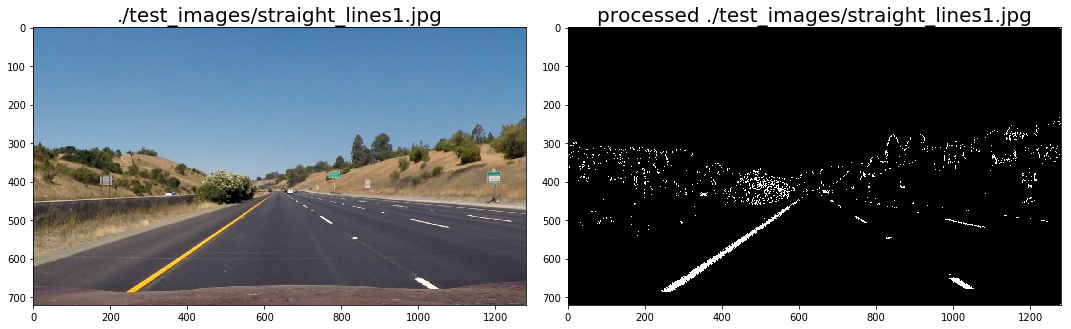

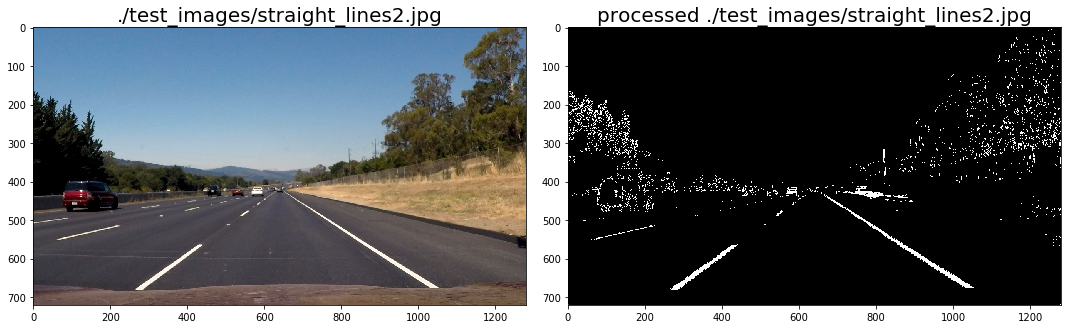

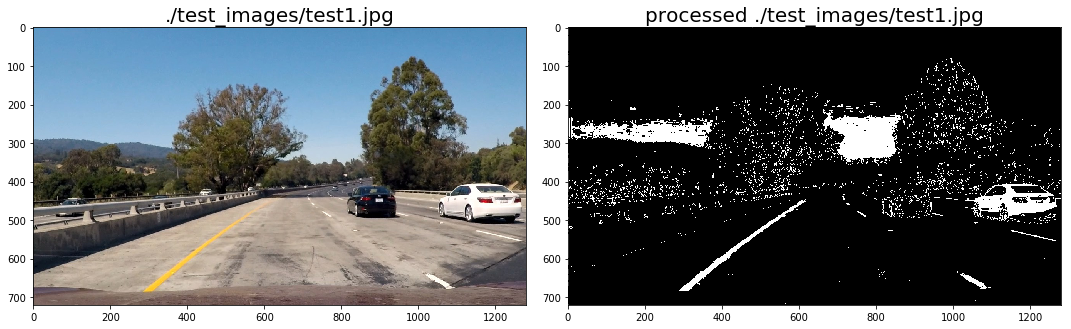

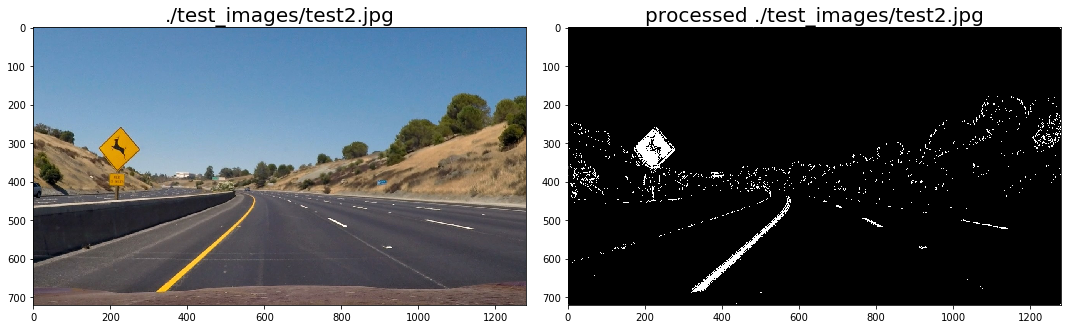

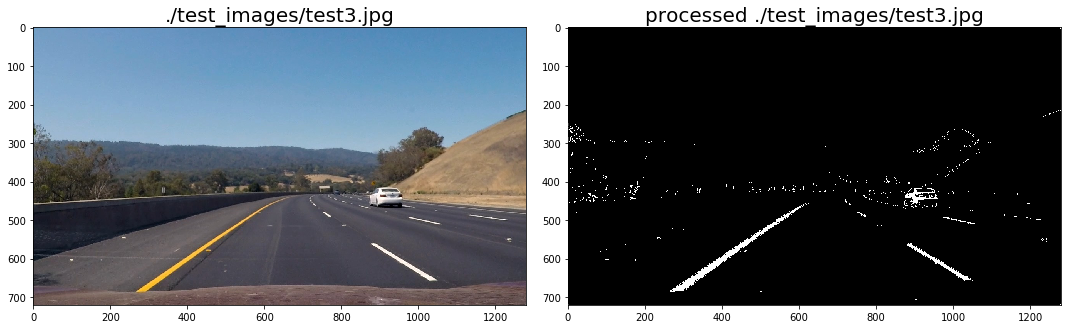

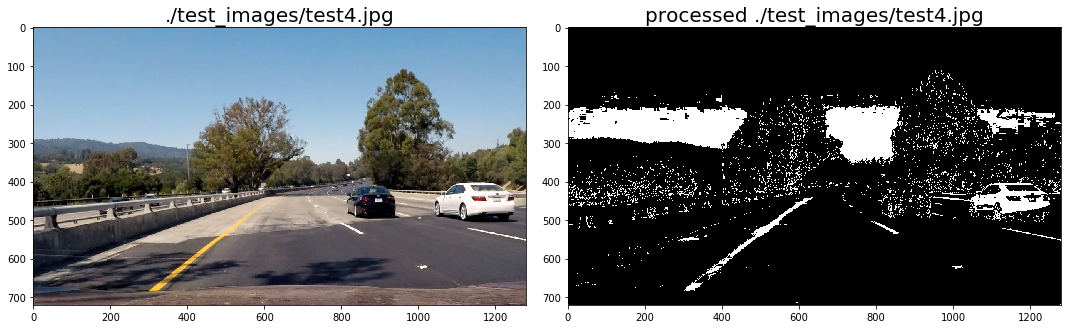

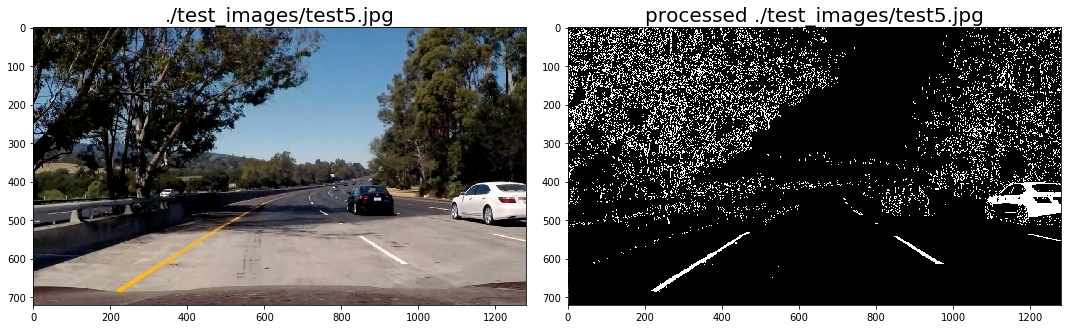

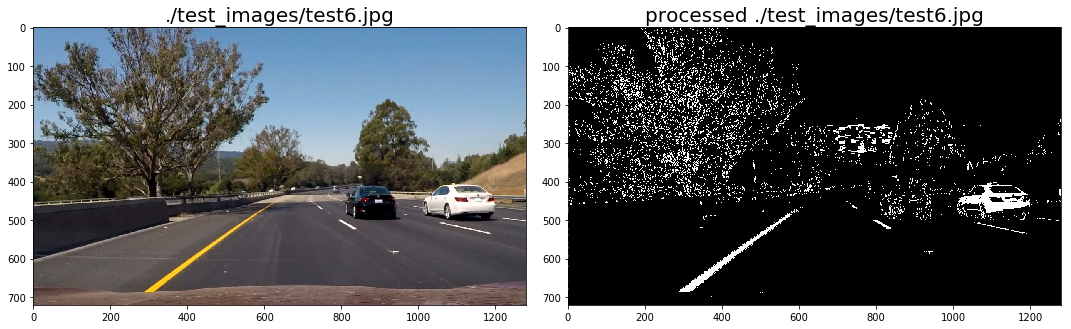

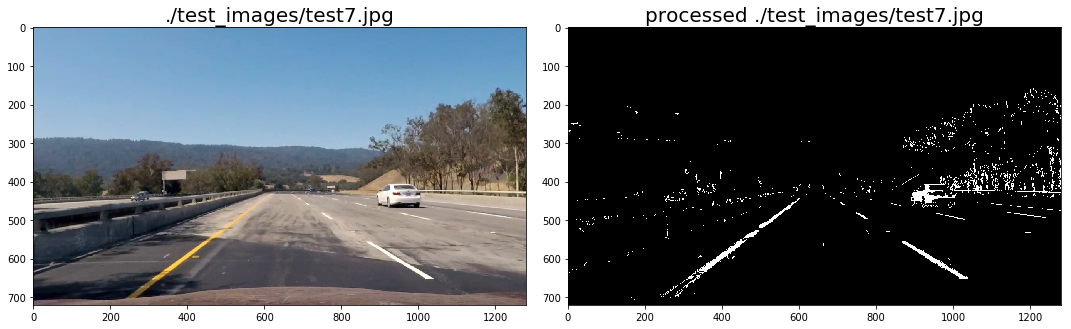

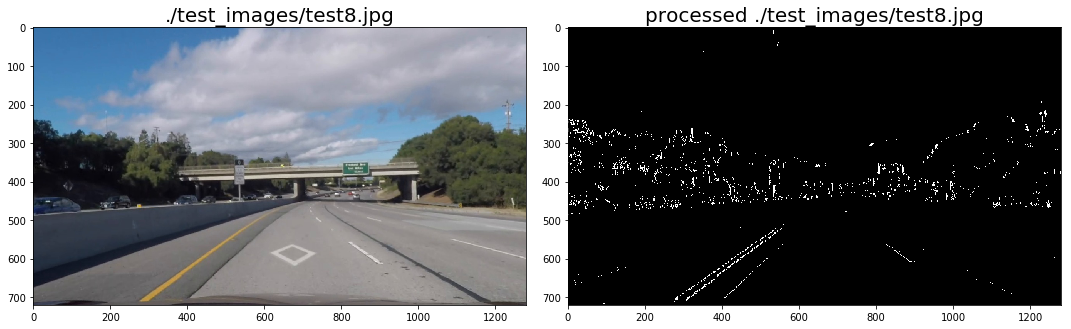

In [383]:
# Helper function to plot 2 images in one figure using subplots
def show_two_images(img1, label1, img2, label2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(label1, fontsize=20)

    if len(img2.shape) == 2 or img2.shape[-1] == 1:
        ax2.imshow(img2, cmap='gray')
    else:
        ax2.imshow(img2)
    ax2.set_title(label2, fontsize=20)

import glob

#Make a list of example images
images = glob.glob('./test_images/*.jpg')

for image in images:
    img = mpimg.imread(image)

    show_two_images(img, image, pipeline(img), "processed {0}".format(image))